<a href="https://colab.research.google.com/github/keeg2025/CSIS225/blob/main/StartingFinalProjectWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!gdown --id 1zQeXiTV0I2IOKqfiIMz-ntD17dXtb3af -O Airline_Delay_Causes.csv

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zQeXiTV0I2IOKqfiIMz-ntD17dXtb3af
To: /content/Airline_Delay_Causes.csv
100% 23.5M/23.5M [00:00<00:00, 61.2MB/s]


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [45]:
df = pd.read_csv('/content/Airline_Delay_Causes.csv')
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,12,MQ,Envoy Air,EVV,"Evansville, IN: Evansville Regional",61.0,9.0,1.52,1.08,...,0.0,5.84,0.0,0.0,732.0,47.0,90.0,19.0,0.0,576.0
1,2024,12,MQ,Envoy Air,EWR,"Newark, NJ: Newark Liberty International",107.0,42.0,6.01,5.89,...,0.0,4.94,0.0,0.0,2531.0,335.0,491.0,1251.0,0.0,454.0
2,2024,12,MQ,Envoy Air,EYW,"Key West, FL: Key West International",169.0,31.0,3.37,0.71,...,0.0,15.48,5.0,3.0,1596.0,143.0,52.0,468.0,0.0,933.0
3,2024,12,MQ,Envoy Air,FAR,"Fargo, ND: Hector International",171.0,35.0,4.64,2.12,...,0.0,12.92,2.0,0.0,2428.0,245.0,184.0,575.0,0.0,1424.0
4,2024,12,MQ,Envoy Air,FSD,"Sioux Falls, SD: Joe Foss Field",69.0,14.0,2.00,2.47,...,0.0,4.83,1.0,0.0,720.0,86.0,154.0,191.0,0.0,289.0


In [46]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,140875.000000,140875.000000,140586.000000,140348.000000,140586.000000,140586.000000,140586.000000,140586.00000,140586.000000,140586.000000,140586.000000,140586.000000,140586.000000,140586.000000,140586.000000,140586.000000,140586.000000
mean,2021.397516,6.563421,298.141294,54.200138,18.117141,1.999597,14.849566,0.15736,18.984712,6.831036,0.704217,3726.449824,1338.031162,218.773925,715.527912,7.343078,1446.754535
std,1.765894,3.506382,870.094634,161.713315,49.141188,7.340959,51.215436,0.76626,64.781190,44.891064,3.261713,12515.613824,4473.922752,898.655113,2879.914973,42.863965,5294.934873
min,2018.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,3.000000,35.000000,5.000000,1.730000,0.000000,0.740000,0.00000,0.970000,0.000000,0.000000,254.000000,78.000000,0.000000,21.000000,0.000000,39.000000
50%,2021.000000,7.000000,82.000000,13.000000,4.975000,0.150000,2.910000,0.00000,3.690000,1.000000,0.000000,816.000000,289.000000,9.000000,108.000000,0.000000,242.000000
75%,2023.000000,10.000000,194.000000,36.000000,13.690000,1.550000,8.540000,0.00000,11.480000,3.000000,0.000000,2355.000000,932.000000,128.000000,351.000000,0.000000,876.000000
max,2024.000000,12.000000,21873.000000,5544.000000,1886.580000,325.410000,1685.740000,58.69000,2588.130000,4951.000000,192.000000,648300.000000,321792.000000,64550.000000,139958.000000,3760.000000,279153.000000


In [47]:
# prompt: can you get me the number of uniques airports in df

# Assuming 'airport' is the column containing airport information
num_unique_airports = df['airport'].nunique()
print(f"Number of unique airports: {num_unique_airports}")


Number of unique airports: 388


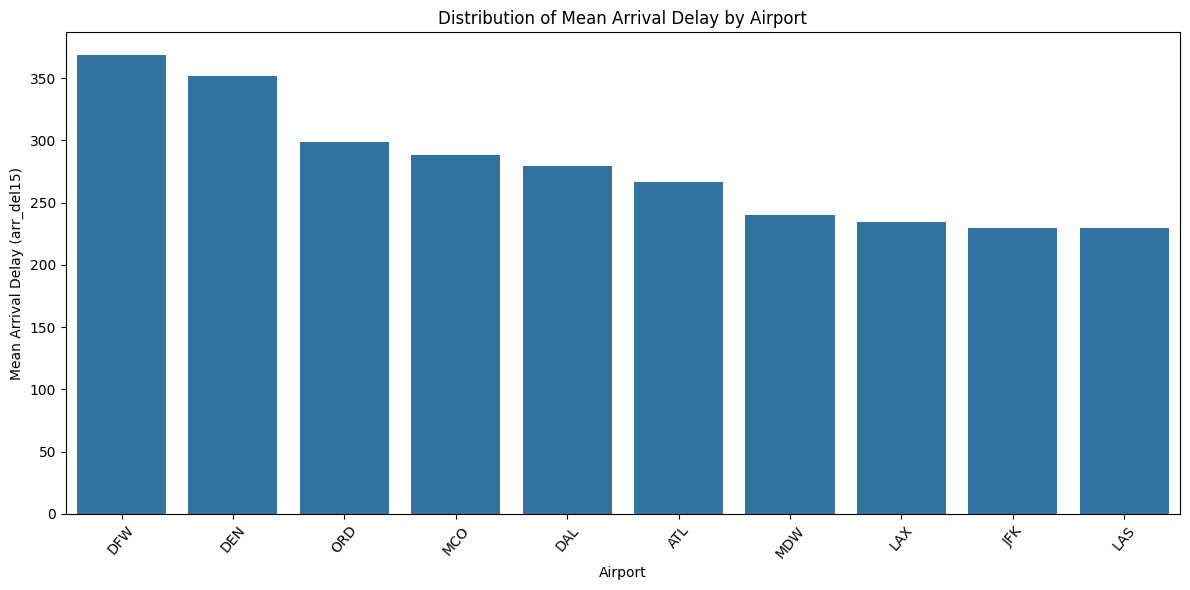

In [48]:
# prompt: make a graph to show the distribution of the arr_del15 by airport (delay #)

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'arr_del15' and 'airport' are the relevant columns
# Group the data by airport and calculate the mean of arr_del15
airport_delay_distribution = df.groupby('airport')['arr_del15'].mean()
    #airport_delay_distribution = airport_delay_distribution[(airport_delay_distribution >= 100)]
airport_delay_distribution = airport_delay_distribution.nlargest(10)


# Create a bar plot of the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=airport_delay_distribution.index, y=airport_delay_distribution.values)
plt.xlabel('Airport')
plt.ylabel('Mean Arrival Delay (arr_del15)')
plt.title('Distribution of Mean Arrival Delay by Airport')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()


In [49]:
# prompt: subset df by airport = "DEN"

# Subset the DataFrame where the 'airport' column is equal to 'DEN'
den_df = df[df['airport'] == 'DEN']

# Print the subsetted DataFrame
print(den_df.head())


      year  month carrier               carrier_name airport  \
308   2024     12      OO      SkyWest Airlines Inc.     DEN   
628   2024     12      UA   United Air Lines Network     DEN   
746   2024     12      WN         Southwest Airlines     DEN   
1053  2024     12      AA  American Airlines Network     DEN   
1169  2024     12      AS    Alaska Airlines Network     DEN   

                          airport_name  arr_flights  arr_del15  carrier_ct  \
308   Denver, CO: Denver International       5791.0      749.0      404.30   
628   Denver, CO: Denver International       8538.0     1050.0      420.34   
746   Denver, CO: Denver International       7668.0     1320.0      381.48   
1053  Denver, CO: Denver International        726.0      175.0       66.56   
1169  Denver, CO: Denver International        167.0       18.0        4.75   

      weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
308        67.72  ...         1.56            179.24           36.0   
628 

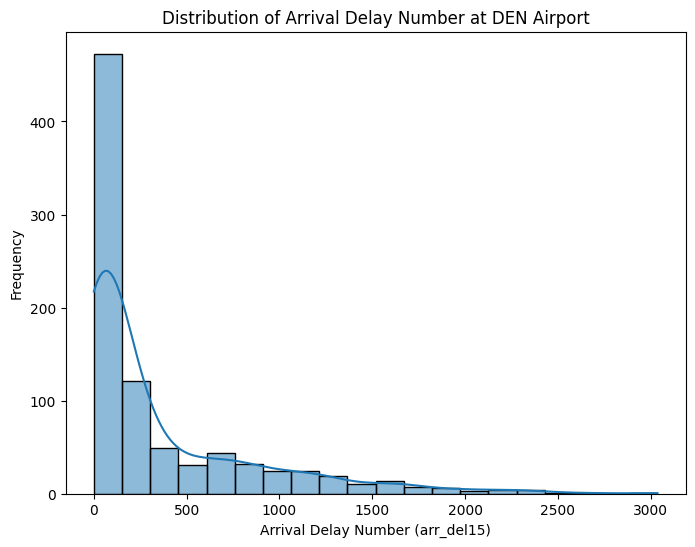

In [50]:
# prompt: can you make a barplot to show the distribution of arr_del15 in the den_df

# Assuming 'arr_del15' is the column you want to analyze in den_df
plt.figure(figsize=(8, 6))
sns.histplot(den_df['arr_del15'], bins=20, kde=True)  # You can adjust the number of bins as needed
plt.xlabel('Arrival Delay Number (arr_del15)')
plt.ylabel('Frequency')
plt.title('Distribution of Arrival Delay Number at DEN Airport')
plt.show()


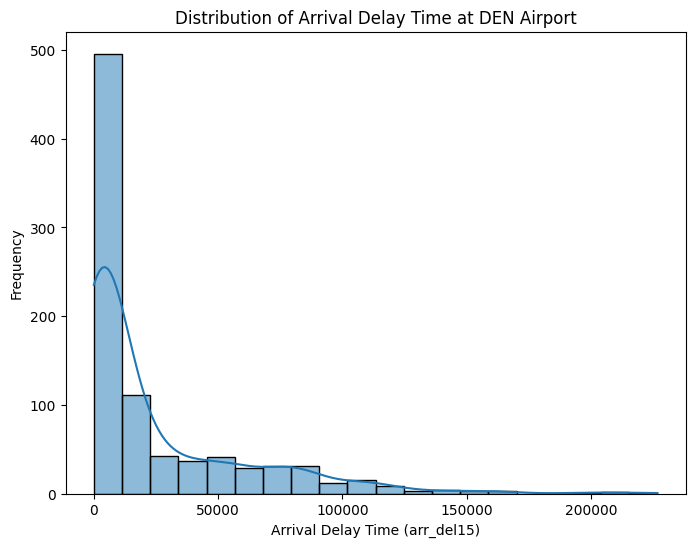

In [51]:
import matplotlib.pyplot as plt
# Assuming 'arr_del15' is the column you want to analyze in den_df
plt.figure(figsize=(8, 6))
sns.histplot(den_df['arr_delay'], bins=20, kde=True)  # You can adjust the number of bins as needed
plt.xlabel('Arrival Delay Time (arr_del15)')
plt.ylabel('Frequency')
plt.title('Distribution of Arrival Delay Time at DEN Airport')
plt.show()


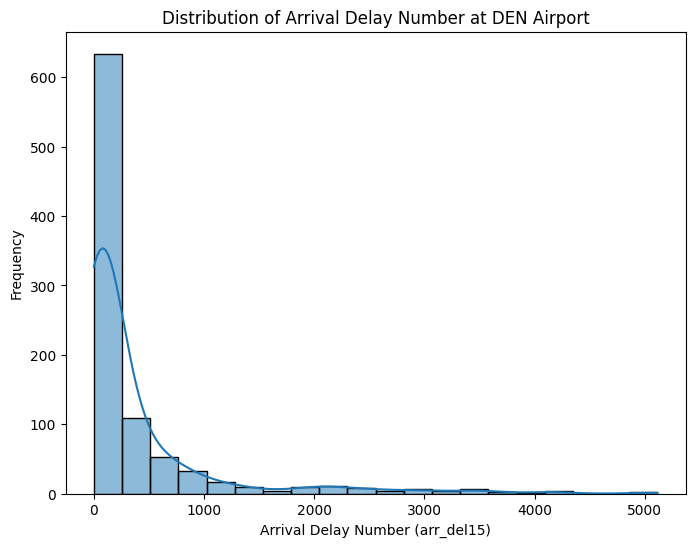

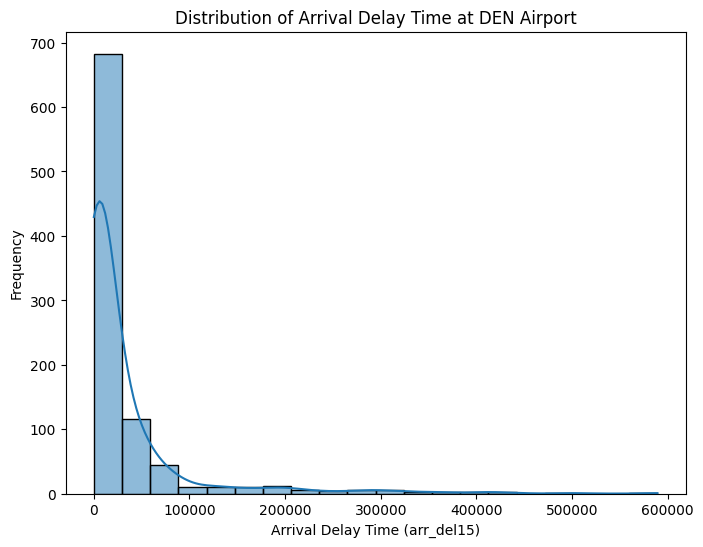

In [52]:
dfw_df = df[df['airport'] == 'DFW']

plt.figure(figsize=(8, 6))
sns.histplot(dfw_df['arr_del15'], bins=20, kde=True)  # You can adjust the number of bins as needed
plt.xlabel('Arrival Delay Number (arr_del15)')
plt.ylabel('Frequency')
plt.title('Distribution of Arrival Delay Number at DEN Airport')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(dfw_df['arr_delay'], bins=20, kde=True)  # You can adjust the number of bins as needed
plt.xlabel('Arrival Delay Time (arr_del15)')
plt.ylabel('Frequency')
plt.title('Distribution of Arrival Delay Time at DEN Airport')
plt.show()

In [53]:
# prompt: A value is trying to be set on a copy of a slice from a DataFrame.
# Try using .loc[row_indexer,col_indexer] = value instead

# Use .loc to assign the new column
dfw_df.loc[:, 'del_freq'] = dfw_df['arr_del15'] / dfw_df['arr_flights'] * 100

max_freq_index = dfw_df['del_freq'].idxmax()
df.loc[max_freq_index]

<ipython-input-53-b474cfc1fb39>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfw_df.loc[:, 'del_freq'] = dfw_df['arr_del15'] / dfw_df['arr_flights'] * 100


,952
year,2024
month,12
carrier,9E
carrier_name,Endeavor Air Inc.
airport,DFW
airport_name,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter..."
arr_flights,2.0
arr_del15,2.0
carrier_ct,0.0
weather_ct,0.0


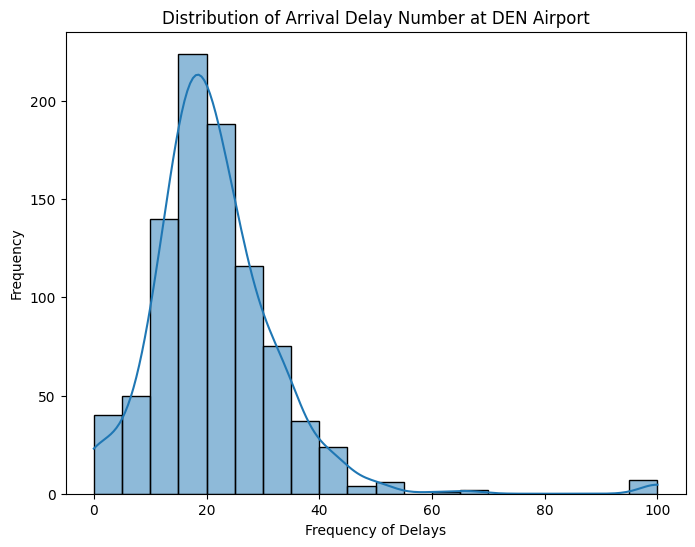

In [54]:
plt.figure(figsize=(8, 6))
sns.histplot(dfw_df['del_freq'], bins=20, kde=True)  # You can adjust the number of bins as needed
plt.xlabel('Frequency of Delays')
plt.ylabel('Frequency')
plt.title('Distribution of Arrival Delay Number at DEN Airport')
plt.show()

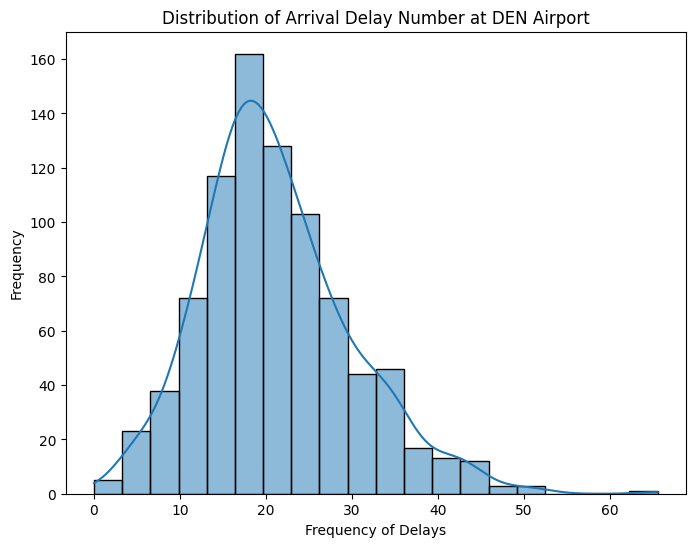

In [55]:
# with a min flight threshold
min_flight_threshold = 10
dfw_df = dfw_df[dfw_df['arr_flights'] > min_flight_threshold]

plt.figure(figsize=(8, 6))
sns.histplot(dfw_df['del_freq'], bins=20, kde=True)  # You can adjust the number of bins as needed
plt.xlabel('Frequency of Delays')
plt.ylabel('Frequency')
plt.title('Distribution of Arrival Delay Number at DEN Airport')
plt.show()

H0 = Is the number of delays (arr_del15) significant to the time of the year(month)?

In [56]:
# prompt: can you make a new dataframe with airports 'ATL', 'LAX', 'DFW', 'DEN', ORD', and 'JFK'

# Create a list of airports
airports = ['ATL', 'LAX', 'DFW', 'DEN', 'ORD', 'JFK']

# Create a new DataFrame containing only the specified airports
df_airports = df[df['airport'].isin(airports)]

# Now you can work with the new DataFrame
print(df_airports.head(1))


    year  month carrier carrier_name airport  \
27  2024     12      MQ    Envoy Air     LAX   

                                  airport_name  arr_flights  arr_del15  \
27  Los Angeles, CA: Los Angeles International         30.0        2.0   

    carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
27         1.0        0.75  ...          0.0               0.0            0.0   

    arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
27           1.0      394.0          217.0          132.0       45.0   

    security_delay  late_aircraft_delay  
27             0.0                  0.0  

[1 rows x 21 columns]


In [57]:
df_airports['date'] = pd.to_datetime(df_airports['year'].astype(str) + '-' + df_airports['month'].astype(str))
df_airports = df_airports[(df_airports['date'] >= '2018-12-01') & (df_airports['date'] <= '2024-12-31')]


<ipython-input-57-8202f90c4f01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airports['date'] = pd.to_datetime(df_airports['year'].astype(str) + '-' + df_airports['month'].astype(str))


In [58]:
df_airports1 = df_airports[df_airports['airport'].isin(['ATL', 'LAX', 'DFW'])]
df_airports2 = df_airports[df_airports['airport'].isin(['DEN', 'ORD', 'JFK'])]

<ipython-input-59-85236c9d68d4>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='arr_del15', data=df, ci=None, hue='airport', legend=False)


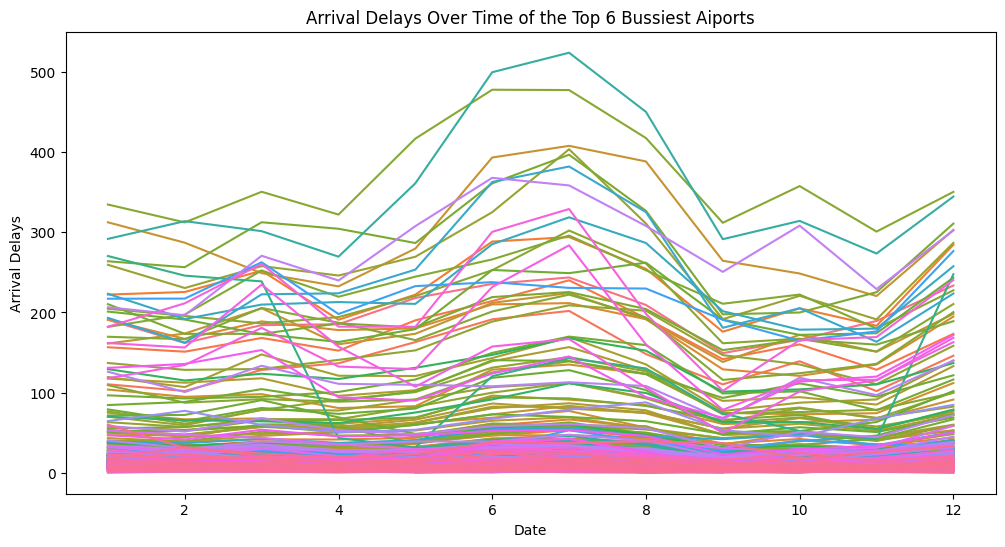

In [59]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='arr_del15', data=df, ci=None, hue='airport', legend=False)
plt.title('Arrival Delays Over Time of the Top 6 Bussiest Aiports')
plt.xlabel('Date')
plt.ylabel('Arrival Delays')
plt.show()

<ipython-input-60-a0b32c9620f2>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='date', y='arr_del15', data=df_airports1, ci=None, hue='airport')


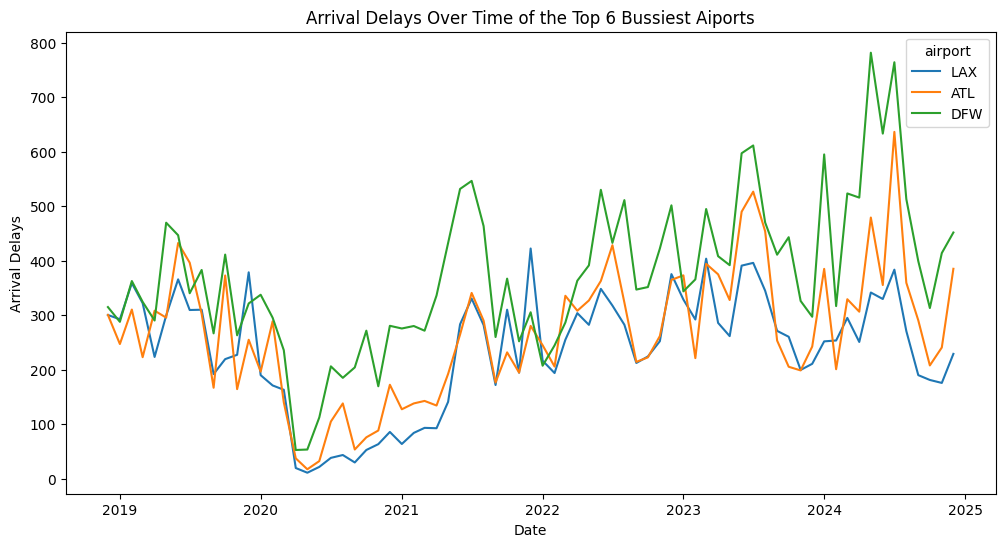

In [60]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='arr_del15', data=df_airports1, ci=None, hue='airport')
plt.title('Arrival Delays Over Time of the Top 6 Bussiest Aiports')
plt.xlabel('Date')
plt.ylabel('Arrival Delays')
plt.show()

<ipython-input-61-6e3fc24d833b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='date', y='arr_del15', data=df_airports2, ci=None, hue='airport')


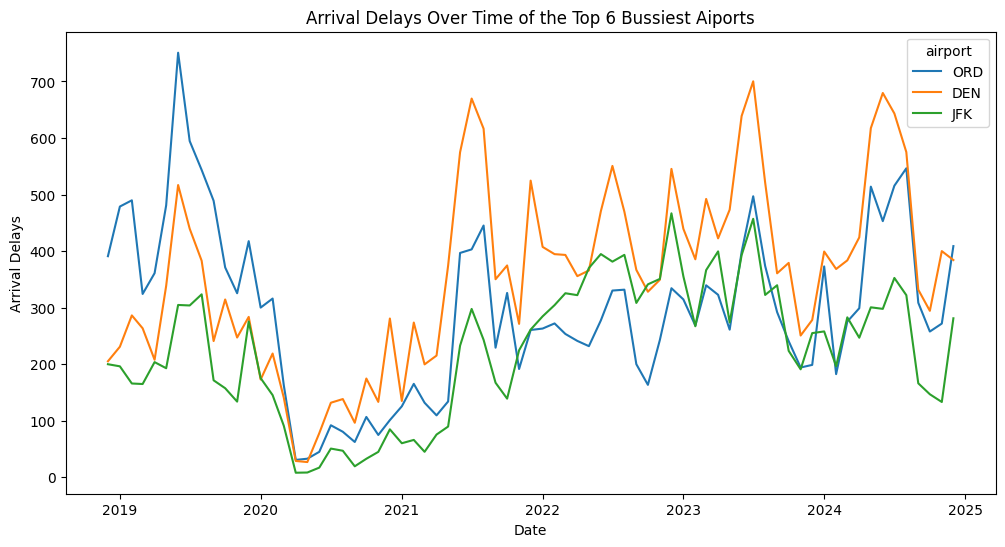

In [61]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='arr_del15', data=df_airports2, ci=None, hue='airport')
plt.title('Arrival Delays Over Time of the Top 6 Bussiest Aiports')
plt.xlabel('Date')
plt.ylabel('Arrival Delays')
plt.show()

## Starting Arima

In [62]:
# might not need!!

df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))
df = df[(df['date'] >= '2018-12-01') & (df['date'] <= '2024-12-31')]

# Check structure
print(df.head())
print(df.isnull().sum())

   year  month carrier carrier_name airport  \
0  2024     12      MQ    Envoy Air     EVV   
1  2024     12      MQ    Envoy Air     EWR   
2  2024     12      MQ    Envoy Air     EYW   
3  2024     12      MQ    Envoy Air     FAR   
4  2024     12      MQ    Envoy Air     FSD   

                               airport_name  arr_flights  arr_del15  \
0       Evansville, IN: Evansville Regional         61.0        9.0   
1  Newark, NJ: Newark Liberty International        107.0       42.0   
2      Key West, FL: Key West International        169.0       31.0   
3           Fargo, ND: Hector International        171.0       35.0   
4           Sioux Falls, SD: Joe Foss Field         69.0       14.0   

   carrier_ct  weather_ct  ...  late_aircraft_ct  arr_cancelled  arr_diverted  \
0        1.52        1.08  ...              5.84            0.0           0.0   
1        6.01        5.89  ...              4.94            0.0           0.0   
2        3.37        0.71  ...             15.4

### check stationarity in time series

<ipython-input-63-dea308ce8e4e>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='date', y='arr_del15', data=df, ci=None)


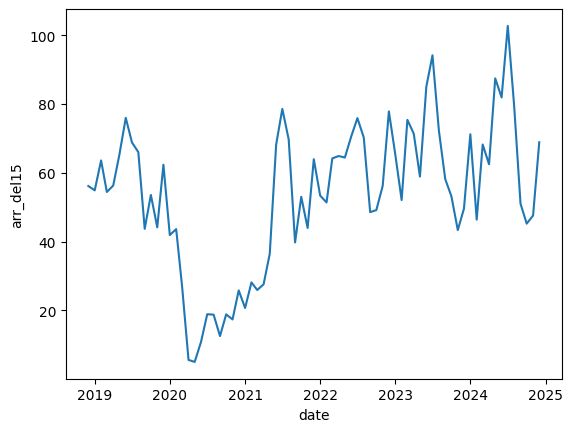

In [63]:
sns.lineplot(x='date', y='arr_del15', data=df, ci=None)
#plt.xticks(rotation=90)
plt.show()

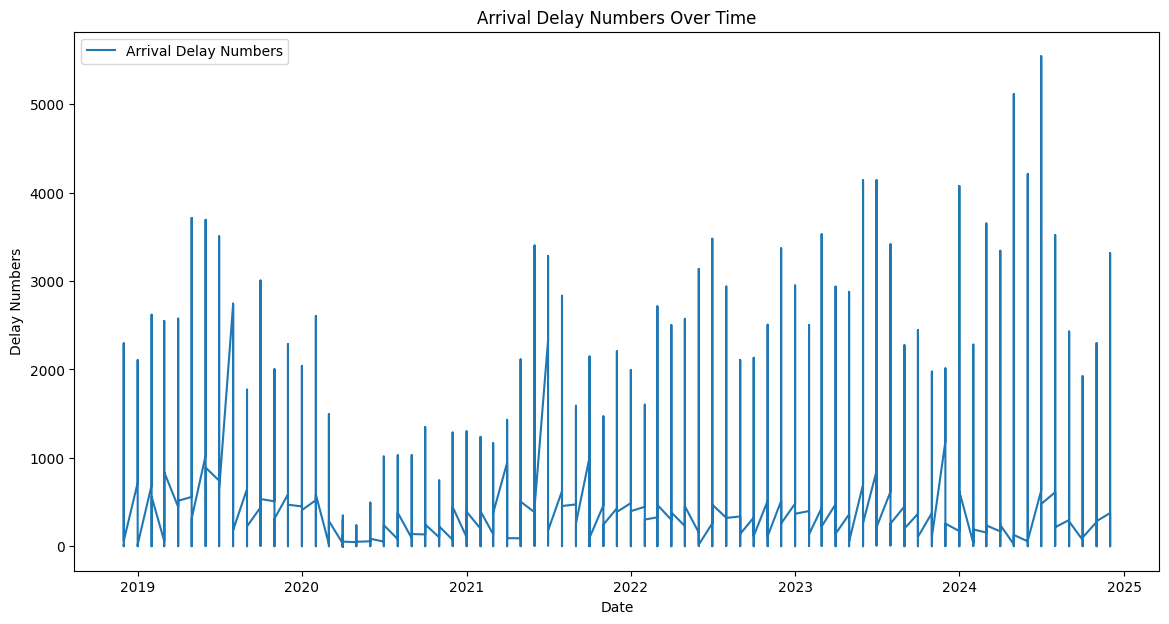

In [64]:
# Plotting the original delay number
plt.figure(figsize=(14, 7))
plt.plot(df_airports['date'], df_airports["arr_del15"], label='Arrival Delay Numbers')
plt.title('Arrival Delay Numbers Over Time')
plt.xlabel('Date')
plt.ylabel('Delay Numbers')
plt.legend()
plt.show()

In [65]:
# Check for NaN or Infinite Values:
print(df_airports["arr_del15"].isnull().sum())  # Check for NaN values
print(np.isinf(df_airports["arr_del15"]).sum())  # Check for infinite values

7
0


In [66]:
# Drop NaN values:
df_airports = df_airports.dropna(subset=["arr_del15"])

# No infinite values to handle (drop)

In [67]:
# Perform the Augmented Dickey-Fuller test on the original series
result_original = adfuller(df_airports["arr_del15"])

print(f"ADF Statistic (Original): {result_original[0]:.4f}")
print(f"p-value (Original): {result_original[1]:.4f}")

if result_original[1] < 0.05:
    print("Interpretation: The original series is Stationary.\n")
else:
    print("Interpretation: The original series is Non-Stationary.\n")

# Apply first-order differencing
df_airports['arr_del_diff'] = df_airports['arr_del15'].diff()

# Perform the Augmented Dickey-Fuller test on the differenced series
result_diff = adfuller(df_airports["arr_del_diff"].dropna())
print(f"ADF Statistic (Differenced): {result_diff[0]:.4f}")
print(f"p-value (Differenced): {result_diff[1]:.4f}")
if result_diff[1] < 0.05:
    print("Interpretation: The differenced series is Stationary.")
else:
    print("Interpretation: The differenced series is Non-Stationary.")


ADF Statistic (Original): -8.7770
p-value (Original): 0.0000
Interpretation: The original series is Stationary.

ADF Statistic (Differenced): -21.2212
p-value (Differenced): 0.0000
Interpretation: The differenced series is Stationary.


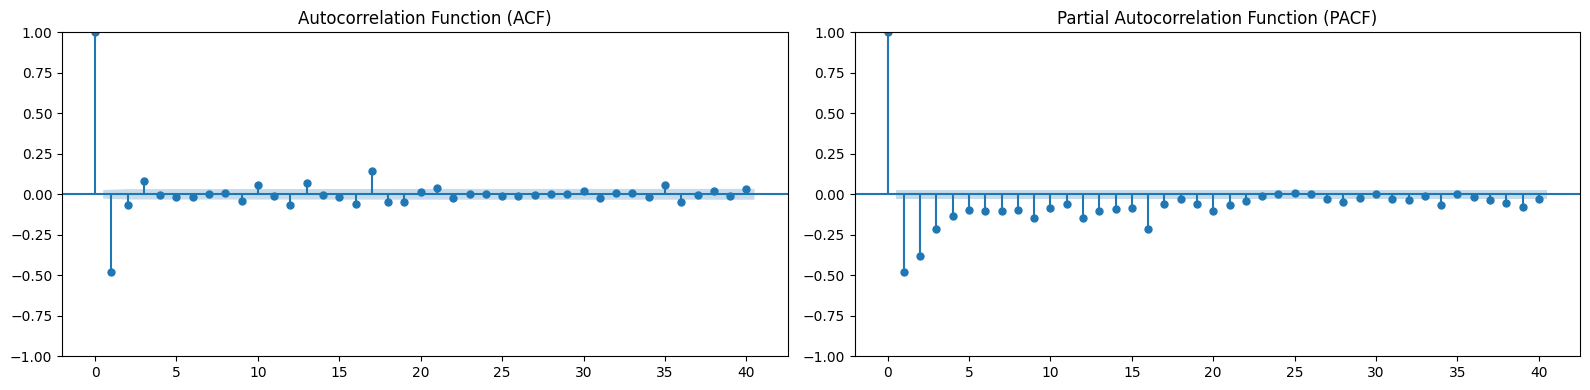

In [68]:
# Plot ACF and PACF for the differenced series
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# ACF plot
plot_acf(df_airports['arr_del_diff'].dropna(), lags=40, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(df_airports['arr_del_diff'].dropna(), lags=40, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [69]:
# Split data into train and test
train_size = int(len(df_airports) * 0.8)
train, test = df_airports.iloc[:train_size], df_airports.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train["arr_del15"], order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [70]:
# Realizing I need date as the index so going to rerun the data

# prompt: How can I make an average 'arr_del15' for each date by airport

# Group by date and airport, then calculate the mean of 'arr_del15'
#average_delays = df_airports.groupby(['date'])['arr_del15'].mean().reset_index()

#average_delays


In [71]:
# prompt: in average_delays can you make the date column the index?

# Group by date and airport, then calculate the mean of 'arr_del15'
average_delays = df_airports.groupby(['date'])['arr_del15'].mean()

# Set the 'date' column as the index
average_delays = average_delays.reset_index()
average_delays = average_delays.set_index('date')

average_delays


,arr_del15
date,
2018-12-01,289.127907
2019-01-01,294.011494
2019-02-01,336.827586
2019-03-01,273.459770
2019-04-01,271.104651
...,...
2024-08-01,432.845070
2024-09-01,285.436620
2024-10-01,235.625000


In [79]:
# Perform the Augmented Dickey-Fuller test on the original series
result_original = adfuller(average_delays["arr_del15"])

print(f"ADF Statistic (Original): {result_original[0]:.4f}")
print(f"p-value (Original): {result_original[1]:.4f}")

if result_original[1] < 0.05:
    print("Interpretation: The original series is Stationary.\n")
else:
    print("Interpretation: The original series is Non-Stationary.\n")


# Since data is alreayd stationary we do not need the difference

  ## Apply first-order differencing
  #average_delays['arr_del_diff'] = average_delays['arr_del15'].diff()

  ## Perform the Augmented Dickey-Fuller test on the differenced series
  #result_diff = adfuller(average_delays["arr_del_diff"].dropna())
  #print(f"ADF Statistic (Differenced): {result_diff[0]:.4f}")
  #print(f"p-value (Differenced): {result_diff[1]:.4f}")
  #if result_diff[1] < 0.05:
      #print("Interpretation: The differenced series is Stationary.")
  #else:
      #print("Interpretation: The differenced series is Non-Stationary.")


ADF Statistic (Original): -3.0062
p-value (Original): 0.0343
Interpretation: The original series is Stationary.



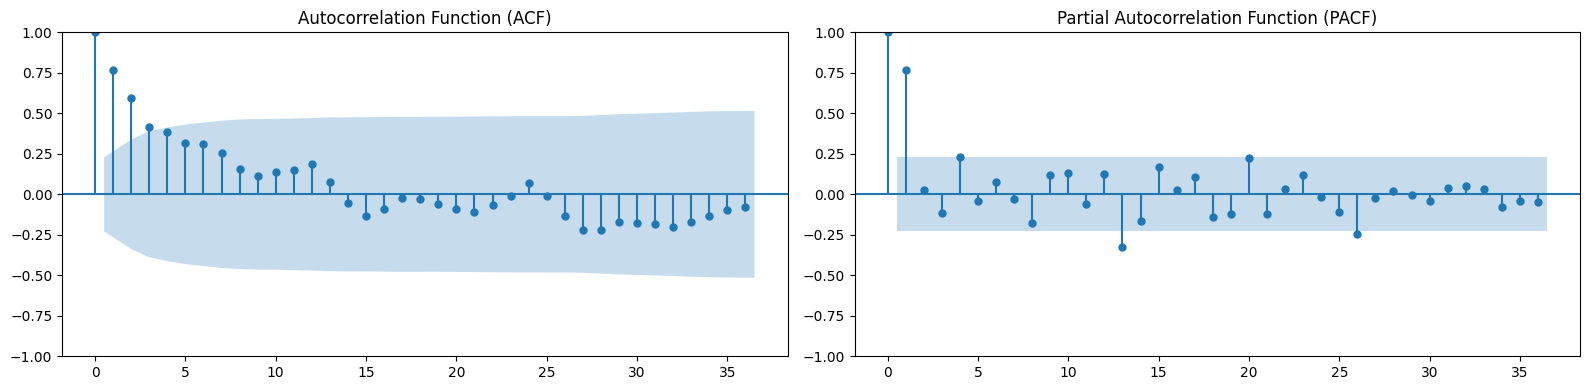

In [82]:
# Plot ACF and PACF for the differenced series
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# ACF plot
plot_acf(average_delays['arr_del15'].dropna(), lags=36, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(average_delays['arr_del15'].dropna(), lags=36, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [84]:
# ensure that the index of your DataFrame (or Series) is a DatetimeIndex and has a defined frequency
average_delays.index = pd.date_range(start='YYYY-MM-DD', periods=len(average_delays), freq='MS')  # Adjust the start date and frequency as needed

DateParseError: Unknown datetime string format, unable to parse: YYYY-MM-DD

In [83]:
# Split data into train and test
train_size = int(len(average_delays) * 0.8)
train, test = average_delays.iloc[:train_size], average_delays.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train["arr_del15"], order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us